In [1]:
import os

while "src" not in os.listdir():
    assert os.getcwd() != "/"
    os.chdir("..")

import matplotlib.pyplot as plt
import numpy as np

from src.lib.nyu_dataset import NYUDataset

In [2]:
DATA_DIR = "data"
DATASET_FILE = "nyu_depth_v2_labeled.mat"

dataset = NYUDataset(os.path.join(DATA_DIR, DATASET_FILE))
print(len(dataset))

1449


(3, 480, 640) (480, 640)


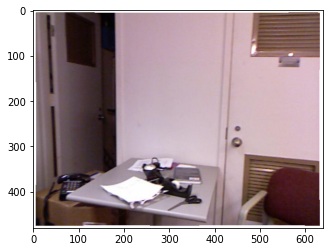

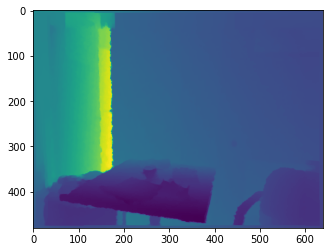

In [3]:
idx = 2
color_image, depth_image = dataset[idx]

print(color_image.shape, depth_image.shape)

plt.imshow(color_image.transpose(1, 2, 0))
plt.show()

plt.imshow(depth_image)
plt.show()

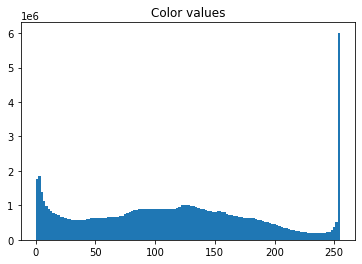

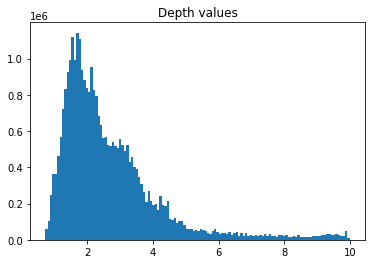

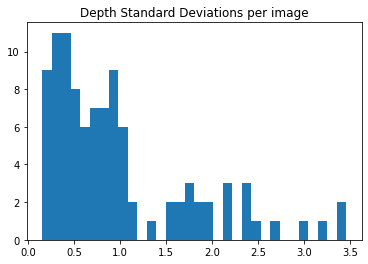

In [4]:
colors100 = np.zeros((100, *color_image.shape))
depths100 = np.zeros((100, *depth_image.shape))

depth_img_std = np.zeros((100))

for i in range(100):
    colors100[i], depths100[i] = dataset[i]
    depth_img_std[i] = np.std(depths100[i])

color_values = colors100.flatten()
depth_values = depths100.flatten()
# plot histograms of the values
plt.hist(color_values, bins=128)
plt.title("Color values")
plt.show()
plt.hist(depth_values, bins=128)
plt.title("Depth values")
plt.show()
plt.hist(depth_img_std, bins=32)
plt.title("Depth Standard Deviations per image");

Color
* Spike at 255
* Perhaps the images are over exposed

Depth
* A bit under 1m to 10m
* Peaks a little under 2m
* Almost all the mass is < 5m

Standard deviation
* Generally < 1m

Conclusion
* Images are not super high quality
* Generally pictures of scenes on a very human spacial scale
    * Things are generally 2m away, +/- 1m
    * No landscapes or macro-photography
* I already knew this, based on the description of the dataset but it's good to see the data confirms that description

In [5]:
shapes = []
for color_image, depth_image in dataset:
    shapes.append(color_image.shape)
    shapes.append(depth_image.shape)
    
# All images have the same height and width
set(shapes)

{(3, 480, 640), (480, 640)}

In [6]:
dataset.close()